In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [18]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [19]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.235575,-0.292969,0.282540,-0.617836,1.991624,0
1,0.261366,2.661136,-3.955753,-0.583419,4.061044,0
2,0.208620,-0.930990,-0.151698,-0.731701,1.561692,1
3,-2.516832,-3.631606,-1.907495,-3.080469,-1.527410,0
4,-1.048569,-2.565088,0.748079,-1.239305,0.840832,1


In [20]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [21]:
# function for feature sampling

def sample_features(df,percent):
  cols = np.random.choice(df.columns.tolist()[:-1], int(percent * (df.shape[1] - 1)), replace=False)
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [22]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [23]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\DELL\AppData\Local\Temp\ipykernel_28860\3874077100.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [24]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\DELL\AppData\Local\Temp\ipykernel_28860\3874077100.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [25]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\DELL\AppData\Local\Temp\ipykernel_28860\3874077100.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [26]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col2', 'target'], dtype='object')
Index(['col1', 'col2', 'target'], dtype='object')
Index(['col1', 'col2', 'target'], dtype='object')


In [27]:
df3

,col1,col2,target
46,-0.887850,-2.296437,1
33,-1.160837,-2.271121,1
20,-1.664680,-1.614284,0
53,-0.819729,-0.521012,1
28,-0.848274,0.029810,0
91,-0.245721,-0.331989,0
93,1.818455,-2.387565,1
27,0.967382,-0.229500,0
78,-1.223795,-1.162958,1
81,-1.781336,-1.399059,0


In [28]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [29]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [30]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9375, 'x[0] <= -1.421\ngini = 0.493\nsamples = 50\nvalue = [22.0, 28.0]'),
 Text(0.23076923076923078, 0.8125, 'x[1] <= -1.115\ngini = 0.363\nsamples = 21\nvalue = [5, 16]'),
 Text(0.3653846153846154, 0.875, 'True  '),
 Text(0.15384615384615385, 0.6875, 'x[0] <= -1.644\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.07692307692307693, 0.5625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.23076923076923078, 0.5625, 'x[1] <= -1.226\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.15384615384615385, 0.4375, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.3076923076923077, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3076923076923077, 0.6875, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.7692307692307693, 0.8125, 'x[1] <= -0.306\ngini = 0.485\nsamples = 29\nvalue = [17, 12]'),
 Text(0.6346153846153846, 0.875, '  False'),
 Text(0.6923076923076923, 0.6875, 'x[0] <= -0.448\ngini = 0.496\nsamples = 22\nvalue = [10, 12]'),
 Text(0.538461538

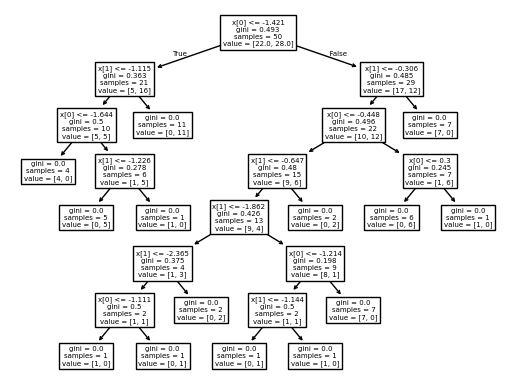

In [31]:
plot_tree(clf1)

[Text(0.46875, 0.95, 'x[0] <= 0.23\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.40625, 0.85, 'x[0] <= -2.26\ngini = 0.499\nsamples = 44\nvalue = [21, 23]'),
 Text(0.4375, 0.8999999999999999, 'True  '),
 Text(0.34375, 0.75, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.46875, 0.75, 'x[1] <= -0.925\ngini = 0.493\nsamples = 41\nvalue = [18.0, 23.0]'),
 Text(0.3125, 0.65, 'x[0] <= -0.818\ngini = 0.434\nsamples = 22\nvalue = [7.0, 15.0]'),
 Text(0.25, 0.55, 'x[1] <= -1.11\ngini = 0.498\nsamples = 15\nvalue = [7, 8]'),
 Text(0.1875, 0.45, 'x[1] <= -1.277\ngini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(0.125, 0.35, 'x[0] <= -1.608\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.0625, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.1875, 0.25, 'x[0] <= -1.264\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.125, 0.15, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.25, 0.15, 'x[1] <= -2.526\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.187

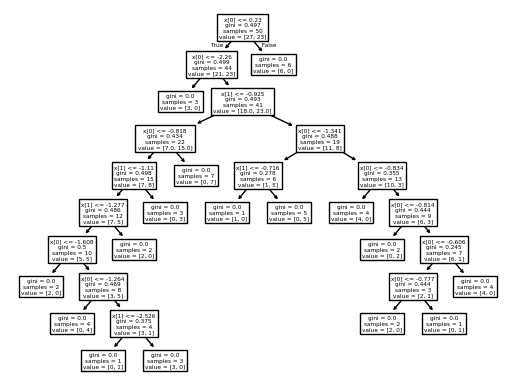

In [32]:
plot_tree(clf2)

[Text(0.6370967741935484, 0.9285714285714286, 'x[1] <= -0.254\ngini = 0.493\nsamples = 50\nvalue = [22.0, 28.0]'),
 Text(0.4032258064516129, 0.7857142857142857, 'x[0] <= -1.644\ngini = 0.426\nsamples = 39\nvalue = [12, 27]'),
 Text(0.5201612903225806, 0.8571428571428572, 'True  '),
 Text(0.12903225806451613, 0.6428571428571429, 'x[1] <= -1.204\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.06451612903225806, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.1935483870967742, 0.5, 'x[0] <= -1.819\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.12903225806451613, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.25806451612903225, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6774193548387096, 0.6428571428571429, 'x[0] <= -0.288\ngini = 0.278\nsamples = 30\nvalue = [5, 25]'),
 Text(0.5161290322580645, 0.5, 'x[0] <= -1.506\ngini = 0.147\nsamples = 25\nvalue = [2, 23]'),
 Text(0.3870967741935484, 0.35714285714285715, 'x[

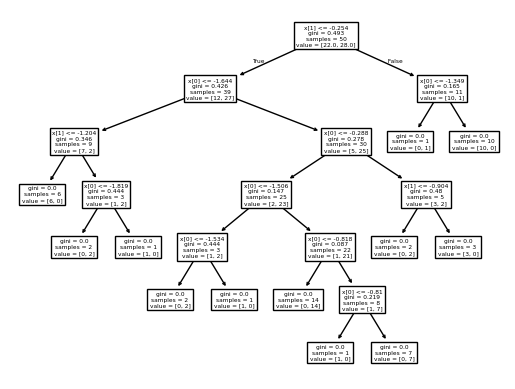

In [33]:
plot_tree(clf3)

In [34]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [35]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [36]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [37]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
88,-1.160165,1.288144,-4.255255,-1.129737,2.714494,0
93,1.818455,-2.387565,1.966221,-1.292323,3.222300,1
3,-2.516832,-3.631606,-1.907495,-3.080469,-1.527410,0
84,-1.002422,-0.319662,-1.852374,-0.862392,-2.479712,1
89,-1.093408,-0.495355,-1.920088,-1.817723,1.515940,0
47,-0.742730,-0.278399,-1.570352,-0.222036,-0.316732,1
78,-1.223795,-1.162958,-0.965687,-0.542803,-0.728089,1
99,-0.600583,-1.470423,-0.307246,-0.316208,1.587000,1
35,0.522513,-0.191351,0.224144,0.199712,1.895235,0
60,-2.317206,0.149496,-2.686204,-0.724178,-2.799932,1
